In [44]:
# time series library import
import os 
import datetime 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

In [45]:
# import the dataset
zip_path = tf.keras.utils.get_file(
    origin = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname = 'jena_climate_2009_2016.csv.zip',
    extract = True)
csv_path, _ = os.path.splitext(zip_path)

In [46]:
jena_climate=pd.read_csv(csv_path)
jena_climate.sample(3)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
173287,17.04.2012 09:40:00,987.55,6.49,280.65,-1.73,55.58,9.68,5.38,4.30,3.40,5.45,1227.66,3.76,5.77,160.6
96267,30.10.2010 13:00:00,980.57,12.54,287.31,5.75,63.20,14.55,9.20,5.36,5.85,9.38,1191.39,2.26,2.56,196.9
227190,26.04.2013 17:30:00,978.41,16.60,291.57,11.16,70.20,18.92,13.28,5.64,8.49,13.58,1170.25,1.23,2.76,47.7


In [47]:
jena_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [48]:
jena_climate.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
p (mbar),420551.0,989.212776,8.358481,913.60,984.20,989.58,994.72,1015.35
T (degC),420551.0,9.450147,8.423365,-23.01,3.36,9.42,15.47,37.28
Tpot (K),420551.0,283.492743,8.504471,250.60,277.43,283.47,289.53,311.34
Tdew (degC),420551.0,4.955854,6.730674,-25.01,0.24,5.22,10.07,23.11
rh (%),420551.0,76.008259,16.476175,12.95,65.21,79.30,89.40,100.00
VPmax (mbar),420551.0,13.576251,7.739020,0.95,7.78,11.82,17.60,63.77
VPact (mbar),420551.0,9.533756,4.184164,0.79,6.21,8.86,12.35,28.32
VPdef (mbar),420551.0,4.042412,4.896851,0.00,0.87,2.19,5.30,46.01
sh (g/kg),420551.0,6.022408,2.656139,0.50,3.92,5.59,7.80,18.13
H2OC (mmol/mol),420551.0,9.640223,4.235395,0.80,6.29,8.96,12.49,28.82


In [49]:
jena_climate.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [50]:
jena_climate.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [51]:
jena_climate=jena_climate[11::12]

In [52]:

bad_wv = jena_climate['wv (m/s)'] == -9999.0
jena_climate.loc[bad_wv, 'wv (m/s)'] = 0.0

bad_max_wv = jena_climate['max. wv (m/s)'] == -9999.0
jena_climate.loc[bad_max_wv, 'max. wv (m/s)'] = 0.0



In [53]:
jena_climate_Train = jena_climate[:24531]
# validation data
jena_climate_val = jena_climate[24531:31540]
# test data
jena_climate_testing = jena_climate[31540:]

# lets check the shape of the data
jena_climate_Train.shape, jena_climate_val.shape, jena_climate_testing.shape

((24531, 15), (7009, 15), (3505, 15))

In [54]:
# managing figure size in the begining of the code
mpl.rcParams['figure.figsize'] = (15,6)
mpl.rcParams['axes.grid'] = False

In [55]:
date_time = pd.to_datetime(jena_climate.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')


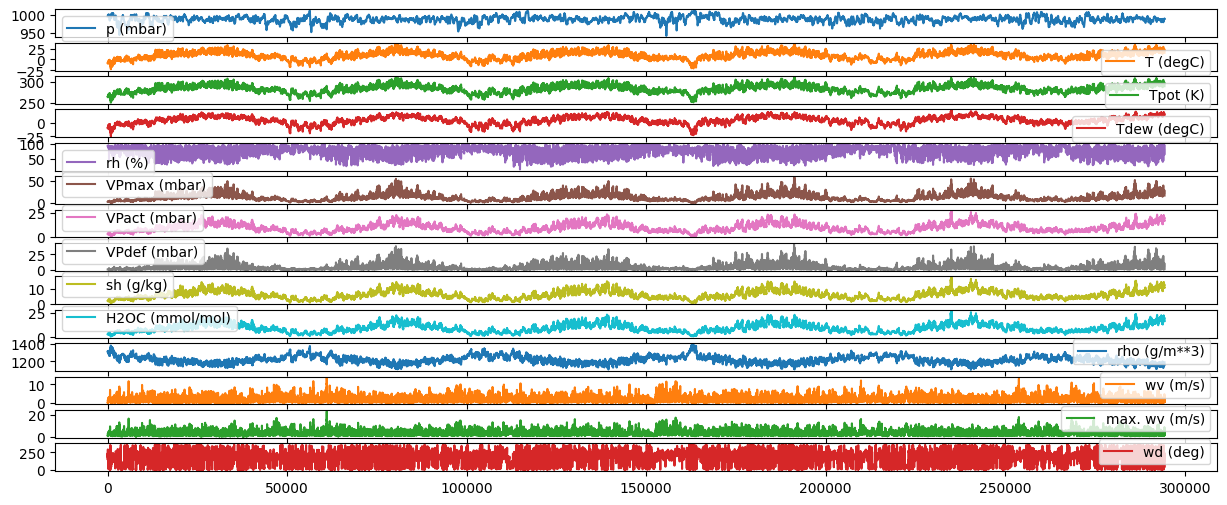

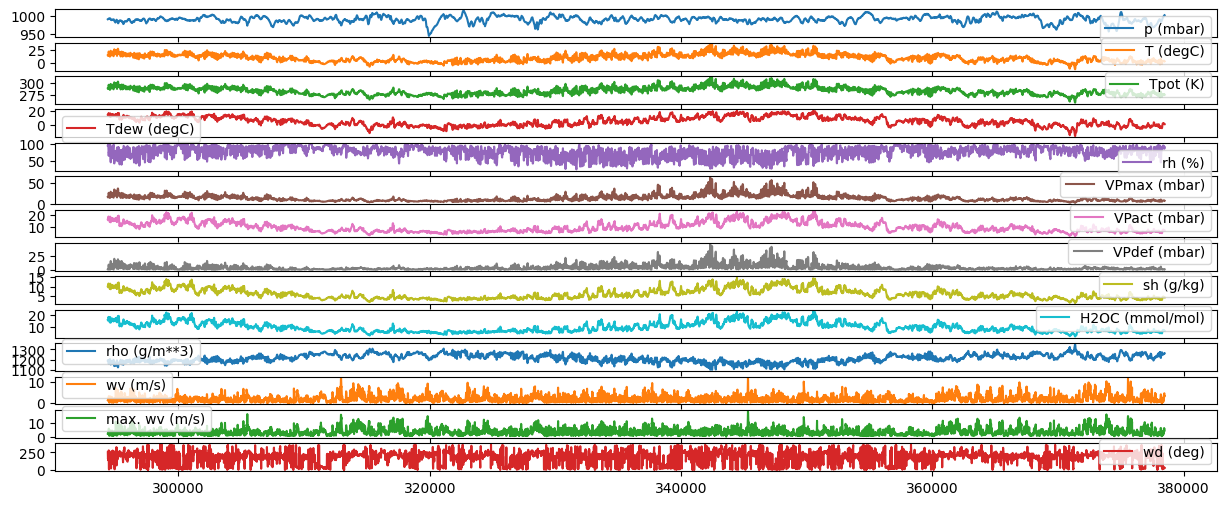

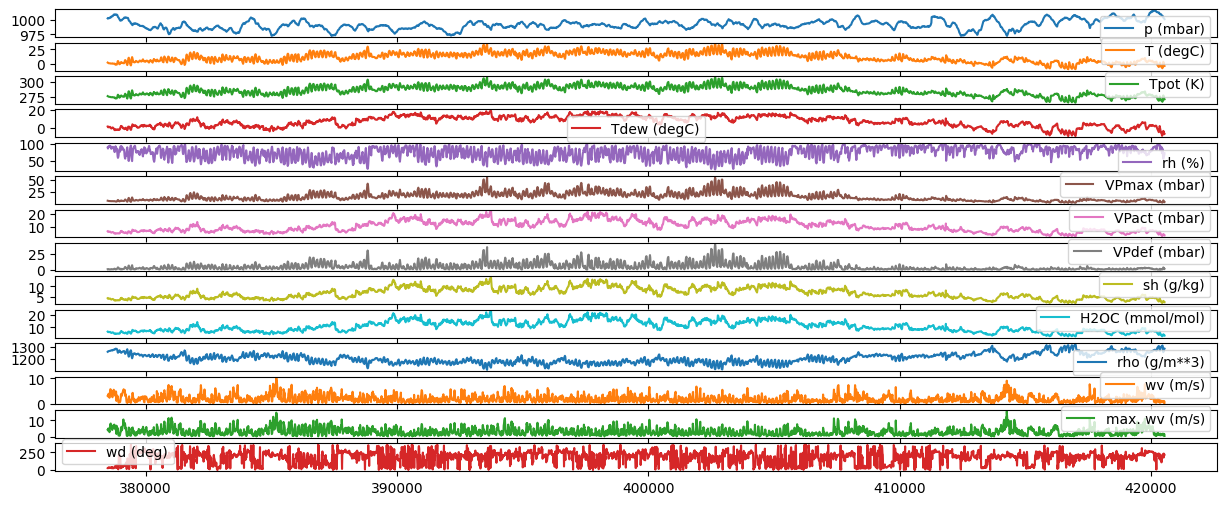

In [56]:
jena_climate_Train.plot(subplots=True)

jena_climate_val.plot(subplots=True)

jena_climate_testing.plot(subplots=True)

plt.show()
